# SED fitting using eazy-py on the SPHEREx yarn cluster

## install eazy-py from https://github.com/gbrammer/eazy-py
> For templates and filters, https://github.com/gbrammer/eazy-photoz/

## what you need: 
- Brown templates 
- brown_templates.param  
- zphot.translate made for Reference Catalog (20 bands)
- zphot.param.default.eazypy
- FILTER.RES.latest.NEW

# First Pilot Run with making `premade_tempfilt.pickle`

> Once we got this file, we can skip many processes for the next run!

In [1]:
#!pip list |grep pyarrow

In [2]:
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
import numpy as np
from astropy.table import Table
from matplotlib.ticker import MultipleLocator
import pandas as pd

from astropy.utils.exceptions import AstropyWarning
import warnings

pd.set_option('display.max_rows', 300)
    
np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

# https://github.com/gbrammer/eazy-py
import eazy

In [3]:
!pip list |grep eazy

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
eazy                      0.6.8               


In [4]:
!pwd

/home/shong/work/sed-fit/pyspark-eazypy/notebook


In [5]:
!ls -alF ../

total 20
drwxrwxr-x 5 shong shong 4096  2월 22 14:54 ./
drwxrwxr-x 4 shong shong 4096  2월 22 15:38 ../
drwxrwxr-x 2 shong shong 4096  2월 13 13:36 data/
drwxrwxr-x 3 shong shong 4096  3월  5 14:56 notebook/
drwxrwxr-x 4 shong shong 4096  2월 26 15:49 premade-data/


In [6]:
!ls -alF

total 25844
drwxrwxr-x 3 shong shong     4096  3월  5 14:56 ./
drwxrwxr-x 5 shong shong     4096  2월 22 14:54 ../
drwxrwxr-x 2 shong shong     4096  2월 29 16:22 .ipynb_checkpoints/
lrwxrwxrwx 1 shong shong       78  3월  5 14:55 FILTER.RES.latest -> /home/shong/work/sed-fit/pyspark-eazypy/premade-data/filters/FILTER.RES.latest
-rw-rw-r-- 1 shong shong  3627073  3월  5 14:55 SPHERExRefCat_eazypy_test10000.cat
-rw-rw-r-- 1 shong shong  3611725  3월  5 14:55 filled_SPHERExRefCat_eazypy_test10000.cat
-rw-rw-r-- 1 shong shong 18584125  2월 28 13:52 premade_tempfilt.pickle
-rw-rw-r-- 1 shong shong   541579  3월  5 14:56 run_eazypy-for-pyspark-yarn-v0-local-test.ipynb
-rw-rw-r-- 1 shong shong    52834  3월  5 14:55 sed-vis.png
-rw-rw-r-- 1 shong shong      773  3월  5 14:56 sparkmonitor_kernelextension.log
lrwxrwxrwx 1 shong shong       62  3월  5 14:55 templates -> /home/shong/work/sed-fit/pyspark-eazypy/premade-data/templates/
-rw-rw-r-- 1 shong shong      385  2월 26 17:14 zphot.HONG.translate
-rw-r

In [7]:
!rm FILTER.RES.latest

In [8]:
!rm templates

### Looking around `eazy` class 

In [9]:
dir(eazy)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'dust_attenuation',
 'fetch_eazy_photoz',
 'filters',
 'get_test_catalog',
 'igm',
 'os',
 'param',
 'photoz',
 'shutil',
 'symlink_eazy_inputs',
 'templates',
 'utils',
 'version']

In [10]:
dir(eazy.photoz)

['AstropyUserWarning',
 'AstropyWarning',
 'BOUNDED_DEFAULTS',
 'CDF_SIGMAS',
 'DEFAULT_RF_FILTERS',
 'DEFAULT_UBVJ_FILTERS',
 'HAS_TQDM',
 'IGM_OBJECT',
 'MIN_VALID_FILTERS',
 'MULTIPROCESSING_TIMEOUT',
 'NUVRK_FILTERS',
 'OrderedDict',
 'PLOTLY_LAYOUT_KWARGS',
 'PhotoZ',
 'TEMPLATE_REDSHIFT_TYPE',
 'Table',
 'TemplateGrid',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_fit_at_zbest_group',
 '_fit_obj',
 '_fit_rest_group',
 '_integrate_tempfilt',
 '_obj_nnls',
 'bspline_templates',
 'const',
 'filters_code',
 'fit_by_redshift',
 'gaussian_templates',
 'igm_module',
 'np',
 'os',
 'param',
 'pyfits',
 'template_lsq',
 'templates_module',
 'time',
 'tqdm',
 'u',
 'utils',
 'warnings']

In [11]:
dir(eazy.photoz.PhotoZ)

['ARRAY_DTYPE',
 'DEC',
 'MW_EBV',
 'NDRAWS',
 'NFILT',
 'NOBJ',
 'NTEMP',
 'NZ',
 'OBJID',
 'PIT',
 'RA',
 'ZML_WITH_BETA_PRIOR',
 'ZML_WITH_PRIOR',
 'ZPHOT_AT_ZSPEC',
 'ZPHOT_USER',
 'ZSPEC',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_uncertainties',
 '_csv_from_arrays',
 '_fit_at_redshift',
 '_fit_on_zgrid',
 '_get_prior_mag',
 '_loss',
 '_make_template_error_function',
 '_redshift_pairs',
 'abs_mag',
 'apply_spatial_offset',
 'cdf_percentiles',
 'compute_best_risk',
 'compute_full_risk',
 'compute_lnp',
 'compute_tef_lnp',
 'error_residuals',
 'evaluate_zml',
 'find_peaks',
 'fit_at_zbest',
 'fit_catalog',
 'fit_parallel',
 'fit_phoenix_stars',
 'fit_s

In [12]:
dir(eazy.photoz.TemplateGrid)

['NFILT',
 'NOBJ',
 'NTEMP',
 'NZ',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'apply_SFH_constraint',
 'init_interpolator',
 'lc',
 'pivot']

In [13]:
catdir = '/home/shong/work/sed-fit/pyspark-eazypy/data/'

In [14]:
%ls -lh $catdir

total 74M
-rw-rw-r-- 1 shong shong  74M  2월 13 10:59 Gaia_EDR3.PS1DR1.CatWISE.AllWISE.2MASS_NSIDE32_000000.fits
-rw-rw-r-- 1 shong shong 8.5K  2월 14 09:26 SPHEREx_RefCat.BandsInfo.fits


In [15]:
phot = Table.read(catdir+'Gaia_EDR3.PS1DR1.CatWISE.AllWISE.2MASS_NSIDE32_000000.fits')
bandinfo = Table.read(catdir+'SPHEREx_RefCat.BandsInfo.fits')
bandinfo

band,wavelength,width,depth,SPHEREx_5sigma
bytes8,float64,float64,float64,float64
Gaia_G,0.6406213132059696,0.43915974233390276,0.0,53.085510728302786
Gaia_BP,0.513111267833689,0.2658491169490311,0.0,53.085510728302786
Gaia_RP,0.7777317076528605,0.24236184115635243,0.0,53.965548333262035
WISE_W1,3.3791913542923844,0.6824145658104114,44.0,44.698305482939475
WISE_W2,4.629296073126975,1.0507794133333335,88.0,201.85536036165806
WISE_W3,12.333758091987896,6.456336678571427,0.0,0.0
WISE_W4,22.253236444625237,3.945210916666667,0.0,0.0
2MASS_J,1.2408375977028412,0.16275755000000006,0.0,56.884998740547665
2MASS_H,1.6513664598513318,0.25094045000000004,0.0,55.468081668755346


In [16]:
list(bandinfo['band'])

['Gaia_G',
 'Gaia_BP',
 'Gaia_RP',
 'WISE_W1',
 'WISE_W2',
 'WISE_W3',
 'WISE_W4',
 '2MASS_J',
 '2MASS_H',
 '2MASS_Ks',
 'PS1_g',
 'PS1_r',
 'PS1_i',
 'PS1_z',
 'PS1_y',
 'VVV_Z',
 'VVV_Y',
 'VVV_J',
 'VVV_H',
 'VVV_Ks',
 'LS_g',
 'LS_r',
 'LS_z']

## to_pandas()

#### SPHEREx Reference Catalog Contents 

In [17]:
photdf = phot.to_pandas()

> Wierdly enough, `int64` is not Null-able. Hence, `pandas` puts  `Gaia_DR2_source_id VVV_DR4_sourceid PS1DR1_Stack_objID` in the `float64` format, which is Null-able. After this ad-hoc conversion, we need to reformat the columns using `Int64`, a Null-able integer in `pandas`. 

> `np.NaN` turns out a `float`. `null` also turns out another value; hence, `null` and `nan` are not exactly the same. In Spark Dataframe, `null` is a default value, instead of `nan`. There will be subtle differences between `null` and `nan`, and, `pandasDF` and `sparkDF`. 

In [18]:
len(photdf.index)

124117

In [19]:
photdf.head(4).T

,0,1,2,3
SPHERExRefID,1657553357130170369,1657553357130170370,1657553357398605824,1657553361425137666
Gaia_EDR3_source_id,-9999,-9999,-9999,-9999
PS1_DR1_StackObject_objID,-9999,-9999,-9999,-9999
CatWISE_source_id,b'0453p030_b0-060944',b'0453p030_b0-064313',b'0453p030_b0-032120',b'0453p030_b0-056109'
AllWISE_designation,b'N/A',b'N/A',b'J025958.65+022234.9',b'N/A'
2MASS_designation,b'N/A',b'N/A',b'N/A',b'N/A'
ra,44.992913,44.991372,44.994414,45.004331
dec,2.377934,2.38027,2.376334,2.380586
ra_error,0.000091,0.000109,0.000056,0.000095
dec_error,0.000089,0.000112,0.000054,0.000095


In [20]:
photdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124117 entries, 0 to 124116
Data columns (total 80 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SPHERExRefID               124117 non-null  int64  
 1   Gaia_EDR3_source_id        124117 non-null  int64  
 2   PS1_DR1_StackObject_objID  124117 non-null  int64  
 3   CatWISE_source_id          124117 non-null  object 
 4   AllWISE_designation        124117 non-null  object 
 5   2MASS_designation          124117 non-null  object 
 6   ra                         124117 non-null  float64
 7   dec                        124117 non-null  float64
 8   ra_error                   124117 non-null  float64
 9   dec_error                  124117 non-null  float64
 10  coord_src                  124117 non-null  int64  
 11  pmra                       124117 non-null  float64
 12  pmra_error                 124117 non-null  float64
 13  pmdec                      12

In [21]:
# change all int-ish to Int64 for `null integer`
photdf['Gaia_EDR3_source_id'] = photdf['Gaia_EDR3_source_id'].astype(pd.Int64Dtype())
photdf['PS1_DR1_StackObject_objID'] = photdf['PS1_DR1_StackObject_objID'].astype(pd.Int64Dtype())
photdf['SPHERExRefID'] = photdf['SPHERExRefID'].astype(pd.Int64Dtype())

In [22]:
photdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124117 entries, 0 to 124116
Data columns (total 80 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SPHERExRefID               124117 non-null  Int64  
 1   Gaia_EDR3_source_id        124117 non-null  Int64  
 2   PS1_DR1_StackObject_objID  124117 non-null  Int64  
 3   CatWISE_source_id          124117 non-null  object 
 4   AllWISE_designation        124117 non-null  object 
 5   2MASS_designation          124117 non-null  object 
 6   ra                         124117 non-null  float64
 7   dec                        124117 non-null  float64
 8   ra_error                   124117 non-null  float64
 9   dec_error                  124117 non-null  float64
 10  coord_src                  124117 non-null  int64  
 11  pmra                       124117 non-null  float64
 12  pmra_error                 124117 non-null  float64
 13  pmdec                      12

### Now, let's take 10000 objects for SED fits

In [23]:
# Replace all NaNs to -99.0
#phot.filled_value = np.float64(np.nan)
#phot.filled(-99.0) # doesn't work! 

# select top 100 objects for testing
sel_phot = phot[0:10000]

In [24]:
# Make EAZY inputfile
inputfile = 'SPHERExRefCat_eazypy_test10000.cat'

# spec z's are unknown, set to an arbitrary negative number as unknown
z_spec = -1.0

bands_ref = ['Gaia_G', 'Gaia_BP', 'Gaia_RP', 
             'WISE_W1','WISE_W2','WISE_W3','WISE_W4',
             '2MASS_J','2MASS_H','2MASS_Ks',
             'PS1_g', 'PS1_r','PS1_i','PS1_z','PS1_y']

#bands_ref = ['WISE_W1','WISE_W2','WISE_W3','WISE_W4',
#             '2MASS_J','2MASS_H','2MASS_Ks',
#             'PS1_g', 'PS1_r','PS1_i','PS1_z','PS1_y']

bands_err = [b + '_error' for b in bands_ref]

bands_eazy = ['gaia_G', 'gaia_BP', 'gaia_RP',
              'w1', 'w2', 'w3', 'w4',
              '2massJ', '2massH', '2massKs',
              'ps1_g', 'ps1_r', 'ps1_i', 'ps1_z', 'ps1_y']

header_list = [' f_'+ b + ' e_' + b for b in bands_eazy]
header_string =  '#id' + ''.join(header_list) + ' z_spec'

print(header_string)

with open(inputfile,'w') as infile:
    print(header_string, file=infile)
    for r in sel_phot:
        ind = r['SPHERExRefID']
        flux_list = [f" {r[b]} {r[e]}" for b, e in zip(bands_ref, bands_err)]
        flux_string = f'{ind}' + ''.join(flux_list) + f' {z_spec}'
        print(flux_string, file=infile)

#id f_gaia_G e_gaia_G f_gaia_BP e_gaia_BP f_gaia_RP e_gaia_RP f_w1 e_w1 f_w2 e_w2 f_w3 e_w3 f_w4 e_w4 f_2massJ e_2massJ f_2massH e_2massH f_2massKs e_2massKs f_ps1_g e_ps1_g f_ps1_r e_ps1_r f_ps1_i e_ps1_i f_ps1_z e_ps1_z f_ps1_y e_ps1_y z_spec


In [25]:
# Replace all NaNs to -99.0
df = pd.read_csv(inputfile, delimiter=' ')
df.replace(np.nan, -99.0, inplace=True)
df.to_csv('filled_'+inputfile, sep=' ', index=False)

In [26]:
%pwd

'/home/shong/work/sed-fit/pyspark-eazypy/notebook'

In [27]:
%ls -alF ../

total 20
drwxrwxr-x 5 shong shong 4096  2월 22 14:54 ./
drwxrwxr-x 4 shong shong 4096  2월 22 15:38 ../
drwxrwxr-x 2 shong shong 4096  2월 13 13:36 data/
drwxrwxr-x 3 shong shong 4096  3월  5 14:56 notebook/
drwxrwxr-x 4 shong shong 4096  2월 26 15:49 premade-data/


In [28]:
%ls -alF ./

total 25836
drwxrwxr-x 3 shong shong     4096  3월  5 14:56 ./
drwxrwxr-x 5 shong shong     4096  2월 22 14:54 ../
drwxrwxr-x 2 shong shong     4096  2월 29 16:22 .ipynb_checkpoints/
-rw-rw-r-- 1 shong shong  3627073  3월  5 14:56 SPHERExRefCat_eazypy_test10000.cat
-rw-rw-r-- 1 shong shong  3611725  3월  5 14:56 filled_SPHERExRefCat_eazypy_test10000.cat
-rw-rw-r-- 1 shong shong 18584125  2월 28 13:52 premade_tempfilt.pickle
-rw-rw-r-- 1 shong shong   541579  3월  5 14:56 run_eazypy-for-pyspark-yarn-v0-local-test.ipynb
-rw-rw-r-- 1 shong shong    52834  3월  5 14:55 sed-vis.png
-rw-rw-r-- 1 shong shong      773  3월  5 14:56 sparkmonitor_kernelextension.log
-rw-rw-r-- 1 shong shong      385  2월 26 17:14 zphot.HONG.translate
-rw-rw-r-- 1 shong shong     5656  2월 27 17:19 zphot.param.default.HONG.eazypy


In [29]:
%ls -alFh ../data/

total 74M
drwxrwxr-x 2 shong shong 4.0K  2월 13 13:36 ./
drwxrwxr-x 5 shong shong 4.0K  2월 22 14:54 ../
-rw-rw-r-- 1 shong shong  74M  2월 13 10:59 Gaia_EDR3.PS1DR1.CatWISE.AllWISE.2MASS_NSIDE32_000000.fits
-rw-rw-r-- 1 shong shong 8.5K  2월 14 09:26 SPHEREx_RefCat.BandsInfo.fits


In [30]:
%ls -alF ../premade-data/

total 32
drwxrwxr-x  4 shong shong  4096  2월 26 15:49 ./
drwxrwxr-x  5 shong shong  4096  2월 22 14:54 ../
-rw-rw-r--  1 shong shong 14769  3월  5 14:55 brown_templates.param
drwxrwxr-x  2 shong shong  4096  2월 26 17:02 filters/
drwxrwxr-x 15 shong shong  4096  2월 26 15:42 templates/


### Brown Templates

> Basically, `brown_templates.param` file will be made, which has dir locations of brown template files.

In [31]:
# make Brown templates input .param file: brown_templates.param
premadedir= '/home/shong/work/sed-fit/pyspark-eazypy/premade-data/'
templatedir = '/home/shong/work/sed-fit/pyspark-eazypy/premade-data/templates/'

tempfile = open(premadedir+'brown_templates.param','w')
tempdir = templatedir+'brown_templates/'
with open(tempdir+'templates.list') as f:
    text = f.readlines()
    size = len(text)

# `brown_templates.param` 
for i in range(0, size):
    tempname = text[i]
    tempname = tempname.strip()  # remove spaces in the beginning and END of a string
    new_tempname = tempdir+tempname
    tempfile.write("%s\t %s\t %s\t %s\t %s\n" % (i+1, new_tempname, 1.0, 0, 1.0)) # no interpolation among templates
tempfile.close()

### Links to Filters and Templates 

In [32]:
dir(eazy.templates)

['AstropyUserWarning',
 'AstropyWarning',
 'ModifiedBlackBody',
 'OrderedDict',
 'PHOENIX_LOGG',
 'PHOENIX_LOGG_FULL',
 'PHOENIX_TEFF',
 'PHOENIX_TEFF_FULL',
 'PHOENIX_ZMET',
 'PHOENIX_ZMET_FULL',
 'Redden',
 'Template',
 'TemplateError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bspline_templates',
 'download_LOWZ_templates',
 'gaussian_templates',
 'load_LOWZ_templates',
 'load_phoenix_stars',
 'load_sonora_stars',
 'np',
 'os',
 'param_table',
 'read_templates_file',
 'u',
 'utils',
 'warnings']

In [33]:
%pwd

'/home/shong/work/sed-fit/pyspark-eazypy/notebook'

In [34]:
!rm FILTER.RES.latest

rm: cannot remove 'FILTER.RES.latest': No such file or directory


In [35]:
!rm templates

rm: cannot remove 'templates': No such file or directory


In [36]:
# Link templates and filter files 
# EAZYCODE is an environment variable that points to the the eazy-photoz distribution
#eazy.symlink_eazy_inputs(path='/home/shong/work/spherex/eazypy/eazy-photoz')
eazy.symlink_eazy_inputs(path='/home/shong/work/sed-fit/pyspark-eazypy/premade-data/')

/home/shong/work/sed-fit/pyspark-eazypy/premade-data/templates -> ./templates
/home/shong/work/sed-fit/pyspark-eazypy/premade-data/filters/FILTER.RES.latest -> ./FILTER.RES.latest


In [37]:
dir(eazy.photoz.PhotoZ)

['ARRAY_DTYPE',
 'DEC',
 'MW_EBV',
 'NDRAWS',
 'NFILT',
 'NOBJ',
 'NTEMP',
 'NZ',
 'OBJID',
 'PIT',
 'RA',
 'ZML_WITH_BETA_PRIOR',
 'ZML_WITH_PRIOR',
 'ZPHOT_AT_ZSPEC',
 'ZPHOT_USER',
 'ZSPEC',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_uncertainties',
 '_csv_from_arrays',
 '_fit_at_redshift',
 '_fit_on_zgrid',
 '_get_prior_mag',
 '_loss',
 '_make_template_error_function',
 '_redshift_pairs',
 'abs_mag',
 'apply_spatial_offset',
 'cdf_percentiles',
 'compute_best_risk',
 'compute_full_risk',
 'compute_lnp',
 'compute_tef_lnp',
 'error_residuals',
 'evaluate_zml',
 'find_peaks',
 'fit_at_zbest',
 'fit_catalog',
 'fit_parallel',
 'fit_phoenix_stars',
 'fit_s

In [38]:
dir(eazy.photoz)

['AstropyUserWarning',
 'AstropyWarning',
 'BOUNDED_DEFAULTS',
 'CDF_SIGMAS',
 'DEFAULT_RF_FILTERS',
 'DEFAULT_UBVJ_FILTERS',
 'HAS_TQDM',
 'IGM_OBJECT',
 'MIN_VALID_FILTERS',
 'MULTIPROCESSING_TIMEOUT',
 'NUVRK_FILTERS',
 'OrderedDict',
 'PLOTLY_LAYOUT_KWARGS',
 'PhotoZ',
 'TEMPLATE_REDSHIFT_TYPE',
 'Table',
 'TemplateGrid',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_fit_at_zbest_group',
 '_fit_obj',
 '_fit_rest_group',
 '_integrate_tempfilt',
 '_obj_nnls',
 'bspline_templates',
 'const',
 'filters_code',
 'fit_by_redshift',
 'gaussian_templates',
 'igm_module',
 'np',
 'os',
 'param',
 'pyfits',
 'template_lsq',
 'templates_module',
 'time',
 'tqdm',
 'u',
 'utils',
 'warnings']

### Load the pre-made template file

In [39]:
import pickle

In [40]:
# Skip these lines if you first run ez for building `premade_tempfilt`
with open('premade_tempfilt.pickle', 'rb') as rfile:
    premade_tempfilt = pickle.load(rfile)

In [41]:
%%time

outputfile = 'SPHERExRefCat_eazypy_test100_photoz'
params = {}
# use fsps templates in zphot.param.default.eazypy
params['CATALOG_FILE'] = 'filled_'+inputfile
params['MAIN_OUTPUT_FILE'] = outputfile
params['FIX_ZSPEC'] = 'n'
params['TEMPLATES_FILE'] = '../premade-data/brown_templates.param' 
params['TEMPLATE_COMBOS'] = 1  # one template at a time
params['N_MIN_COLORS'] = 3  # EAZY default value : 5
params['APPLY_PRIOR'] = 'y'
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'
params['PRIOR_FILTER'] = 163 # 2MASS Ks band
params['GET_ZP_OFFSETS'] = 'n' # do not apply zeropoint offset
params['PRIOR_ABZP'] = 25
params['MW_EBV'] = 0.0 # apply galactic extinction
params['VERBOSITY'] = 1.0 # set 2.0 or larger to print all verbose information 

params['Z_MAX'] = 6.0
params['Z_STEP'] = 0.01

    
params['VERBOSITY'] = 1
    
#ez = eazy.photoz.PhotoZ(param_file='zphot.param.default.HONG.eazypy',translate_file='zphot.HONG.translate',
#                        zeropoint_file=None, params=params,
#                        load_prior=True, load_products=False)

ez = eazy.photoz.PhotoZ(param_file='zphot.param.default.HONG.eazypy',translate_file='zphot.HONG.translate', \
                        zeropoint_file=None, params=params, \
                        load_prior=True, load_products=False, tempfilt=premade_tempfilt)

Read default param file: zphot.param.default.HONG.eazypy
Parameter default: CATALOG_FORMAT = ascii.commented_header
Read CATALOG_FILE: filled_SPHERExRefCat_eazypy_test10000.cat
   >>> NOBJ = 10000
f_gaia_G e_gaia_G (406): Gaia_G
f_gaia_BP e_gaia_BP (407): Gaia_BP
f_gaia_RP e_gaia_RP (408): Gaia_RP
f_w1 e_w1 (244): WISE/RSR-W1.txt
f_w2 e_w2 (245): WISE/RSR-W2.txt
f_w3 e_w3 (246): WISE/RSR-W3.txt
f_w4 e_w4 (247): WISE/RSR-W4.txt
f_2massJ e_2massJ (161): 2MASS/J.res
f_2massH e_2massH (162): 2MASS/H.res
f_2massKs e_2massKs (163): 2MASS/K.res
f_ps1_g e_ps1_g (334): PAN-STARRS/PS1.g
f_ps1_r e_ps1_r (335): PAN-STARRS/PS1.r
f_ps1_i e_ps1_i (336): PAN-STARRS/PS1.i
f_ps1_z e_ps1_z (337): PAN-STARRS/PS1.z
f_ps1_y e_ps1_y (338): PAN-STARRS/PS1.y
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  templates/prior_K_TAO.dat


194it [00:00, 974.82it/s]

CPU times: user 593 ms, sys: 26 ms, total: 619 ms
Wall time: 618 ms


In [42]:
## Save the TemplateGrid as a pickle for later usages 
#premade_tempfilt = ez.tempfilt
#with open('premade_tempfilt.pickle', 'wb') as wfile:
#    pickle.dump(premade_tempfilt, wfile, protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
%ls -alFh |grep tempfilt

-rw-rw-r-- 1 shong shong  18M  2월 28 13:52 premade_tempfilt.pickle


In [44]:
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera, https://stackoverflow.com/a/109493/1870 modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

# Get the size of the ez variable in bytes
size_of_ez = sys.getsizeof(ez)

# Optionally, convert the size to a human-readable format
human_readable_size = sizeof_fmt(size_of_ez)

print(f"The memory size of the 'ez' variable is approximately: {size_of_ez} bytes ({human_readable_size})")


The memory size of the 'ez' variable is approximately: 48 bytes (48.0 B)


### Explore what the `ez` class has

In [45]:
ez.zgrid[:5]

array([0.01      , 0.02015067, 0.03040335, 0.04075908, 0.05121888],
      dtype=float32)

In [46]:
len(ez.zgrid)

194

In [47]:
ez.zp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
ez.NOBJ

10000

In [49]:
ez.NFILT

15

In [50]:
ez.NTEMP

129

In [51]:
ez.idx

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [52]:
ez.chi2_best

array([-1., -1., -1., ..., -1., -1., -1.], dtype=float32)

In [53]:
ez.chi2_fit

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
ez.param.params['VERBOSITY']

1

In [55]:
ez.fnu[0,:]

array([-99.      , -99.      , -99.      ,  20.155798,  25.846395,
       -99.      , -99.      , -99.      , -99.      , -99.      ,
       -99.      , -99.      , -99.      , -99.      , -99.      ],
      dtype=float32)

In [56]:
ez.fnu.shape

(10000, 15)

In [57]:
ez.fnu[1,:]

array([-99.      , -99.      , -99.      ,  17.186996,  19.806147,
       -99.      , -99.      , -99.      , -99.      , -99.      ,
       -99.      , -99.      , -99.      , -99.      , -99.      ],
      dtype=float32)

In [58]:
ez.fnu[999,:]

array([-99.      , -99.      , -99.      ,  13.390599,   9.79039 ,
       -99.      , -99.      , -99.      , -99.      , -99.      ,
         6.5524  ,  10.121387,  12.848145,  12.793813,  15.728235],
      dtype=float32)

# Modding `eazy-py` for PySpark


> I modify some codes to make them run on Spark Cluster

In [59]:
# Some Global Variables from the PhotoZ class
TRUE_VALUES = [True, 'y', 'yes', 'Y', 'Yes']

__all__ = ["PhotoZ", "TemplateGrid"]

DEFAULT_UBVJ_FILTERS = [153,154,155,161] # Maiz-Appellaniz & 2MASS

DEFAULT_RF_FILTERS = [270, 274] # UV tophat
DEFAULT_RF_FILTERS += [120, 121] # GALEX
DEFAULT_RF_FILTERS += [156, 157, 158, 159, 160] #SDSS
DEFAULT_RF_FILTERS += [161, 162, 163] # 2MASS

MIN_VALID_FILTERS = 1

NUVRK_FILTERS = [121, 158, 163]

CDF_SIGMAS = np.linspace(-5, 5, 51)

In [60]:
# A new ad-hoc fit_object function

def kasi_fit_object(ez, iobj=0, z=0):
    """
    Fit on the redshift grid
    """
    from scipy.optimize import nnls
    #import np.linalg
                
    fnu_i = ez.fnu[iobj, :]*ez.ext_redden
    efnu_i = ez.efnu[iobj,:]*ez.ext_redden
    ok_band = (fnu_i > ez.param['NOT_OBS_THRESHOLD']) & (efnu_i > 0)
        
    A = ez.tempfilt(z)
    var = (0.0*fnu_i)**2 + efnu_i**2 + (ez.TEF(z)*fnu_i)**2
        
    chi2 = np.zeros(ez.NZ, dtype=ez.ARRAY_DTYPE)
    coeffs = np.zeros((ez.NZ, ez.NTEMP), dtype=ez.ARRAY_DTYPE)
        
    for iz in range(ez.NZ):
        A = ez.tempfilt(ez.zgrid[iz])
        var = (0.0*fnu_i)**2 + efnu_i**2 + (ez.TEF(ez.zgrid[iz])*fnu_i)**2
        rms = np.sqrt(var)
            
        ok_temp = (np.sum(A, axis=1) > 0)
        if ok_temp.sum() == 0:
            chi2[iz] = np.inf
            coeffs[iz, :] = 0.
            continue
                
        try:
            coeffs_x, rnorm = nnls((A/rms).T[ok_band,:][:,ok_temp], (fnu_i/rms)[ok_band])
            coeffs_i = np.zeros(A.shape[0], dtype=ez.ARRAY_DTYPE)
            coeffs_i[ok_temp] = coeffs_x
        except:
            coeffs_i = np.zeros(A.shape[0], dtype=ez.ARRAY_DTYPE)
                
        fmodel = np.dot(coeffs_i, A)
        chi2[iz] = np.sum((fnu_i-fmodel)**2/var*ok_band)
        coeffs[iz, :] = coeffs_i
    
    
    
        
    return iobj, chi2, coeffs, fmodel



In [61]:
idx_fit = 2

In [62]:
idummy, tempchi, tempcoeff, tempfmodel = kasi_fit_object(ez,iobj=idx_fit,z=0)

In [63]:
print(idummy)

2


In [64]:
print(len(tempchi))

194


In [65]:
print(len(tempcoeff))

194


In [66]:
print(len(tempfmodel))

15


In [67]:
tempfmodel

array([2.38316118e-01, 4.40104216e-04, 7.73960777e-01, 3.33861471e+01,
       4.20840501e+01, 1.03129161e+02, 5.94604814e+02, 5.35159071e+00,
       6.39456252e+00, 9.36179348e+00, 6.49304827e-11, 5.74059530e-03,
       6.08091423e-02, 2.36028338e+00, 4.29458162e+00])

In [68]:
#ez.template_lsq

In [69]:
print(ez.chi2_fit[idx_fit,:])
len(ez.chi2_fit[idx_fit,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


194

In [70]:
print(ez.fit_coeffs[idx_fit,:])
len(ez.fit_coeffs[idx_fit,:])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


194

In [71]:
print(ez.fmodel[idx_fit,:])
len(ez.fmodel[idx_fit,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


15

In [72]:
ez.chi2_fit[idx_fit,:] = tempchi

In [73]:
ez.fit_coeffs[idx_fit,:] = tempcoeff

In [74]:
ez.fmodel[idx_fit,:] = tempfmodel

In [75]:
has_chi2 = (ez.chi2_fit != 0).sum(axis=1) > 0 

In [76]:
has_chi2

array([False, False,  True, ..., False, False, False])

In [77]:
def kasi_compute_lnp(ez, prior=False, beta_prior=False, clip_wavelength=1100, in_place=True):

    import time
        
    has_chi2 = (ez.chi2_fit != 0).sum(axis=1) > 0 
    #min_chi2 = ez.chi2_fit[has_chi2,:].min(axis=1)
        
    loglike = -ez.chi2_fit[has_chi2,:]/2.
    #pz = np.exp(-(ez.chi2_fit[has_chi2,:].T-min_chi2)/2.).T
        
    if ez.param['VERBOSITY'] >= 2:
        print('compute_lnp ({0})'.format(time.ctime()))
            
    if hasattr(ez, 'tef_lnp'):
        if ez.param['VERBOSITY'] >= 2:
            print(' ... tef_lnp')
            
        loglike += ez.tef_lnp[has_chi2,:]
            
    if prior:
        if ez.param['VERBOSITY'] >= 2:
            print(' ... full_logprior')
            
        loglike += ez.full_logprior[has_chi2,:]
        
    if clip_wavelength is not None:
        # Set pz=0 at redshifts where clip_wavelength beyond reddest 
        # filter
        clip_wz = clip_wavelength*(1+ez.zgrid)
        red_mask = (clip_wz[:,None] > ez.lc_reddest[None, has_chi2]).T
            
        loglike[red_mask] = -np.inf
        ez.lc_zmax = ez.lc_reddest/clip_wavelength - 1
        ez.clip_wavelength = clip_wavelength
            
    if beta_prior:
        if ez.param['VERBOSITY'] >= 2:
            print(' ... beta lnp_beta')
                
        p_beta = ez.prior_beta(w1=1350, w2=1800, sample=has_chi2)
        ez.lnp_beta[has_chi2,:] = np.log(p_beta)
        ez.lnp_beta[~np.isfinite(ez.lnp_beta)] = -np.inf
        loglike += ez.lnp_beta[has_chi2,:]
        
    # Optional extra prior
    if hasattr(ez, 'extra_lnp'):
        loglike += ez.extra_lnp[has_chi2,:]
            
    loglike[~np.isfinite(loglike)] = -1e20
        
        
    lnpmax = loglike.max(axis=1)
    pz = np.exp(loglike.T - lnpmax).T
    log_norm = np.log(pz.dot(ez.trdz))
        
    lnp = (loglike.T - lnpmax - log_norm).T
    #lnpmax = -log_norm
        
    lnp[~np.isfinite(lnp)] = -1e20
        
    if in_place:
        ez.lnp[has_chi2,:] = lnp
        ez.lnpmax[has_chi2] = -log_norm
        
        ez.lnp_with_prior = prior
        ez.lnp_with_beta_prior = beta_prior
    else:
        return has_chi2, lnp, -log_norm
            
    del(lnpmax)
    del(pz)
    del(log_norm)
    del(loglike)
    del(lnp)


> `kasi_compute_lnp` still works for a series of pre-calculated `chi2` objects. I need to make a code running on one-by-one basis. Hence, I am making `kasi_compute_lnp_object` as below

In [78]:
def kasi_compute_lnp_object(idx_fit,in_chi2_fit_object,ez, prior=False, beta_prior=False, clip_wavelength=1100):
    '''
    The main issue : `idx_fit` was an 1 dim array in the original code. 
    In this modding code, it should a single value, not an array. 
    Hence, for the compatibility, each single value should be wrapped as a one-element 1 D array, 
    such as [0] instead of 0. 
    
    So.. loglike should be wrapped as loglike[None,:] to forcefully make it as a multi-dim array.
    
    The final output also should lower the array dimension such as lnp[0] and lnpmax[0] from 2d to 1d. 
    '''
    
    import time
    
    has_chi2 = idx_fit # now this func will fit each object
    #has_chi2 = (ez.chi2_fit != 0).sum(axis=1) > 0 
    #min_chi2 = ez.chi2_fit[has_chi2,:].min(axis=1)
    
    loglike = -1.0*in_chi2_fit_object/2.
    #loglike = -ez.chi2_fit[has_chi2,:]/2.
    #pz = np.exp(-(ez.chi2_fit[has_chi2,:].T-min_chi2)/2.).T
        
    if ez.param['VERBOSITY'] >= 2:
        print('compute_lnp ({0})'.format(time.ctime()))
            
    if hasattr(ez, 'tef_lnp'):
        if ez.param['VERBOSITY'] >= 2:
            print(' ... tef_lnp')
            
        loglike += ez.tef_lnp[has_chi2,:]
            
    if prior:
        if ez.param['VERBOSITY'] >= 2:
            print(' ... full_logprior')
            
        loglike += ez.full_logprior[has_chi2,:]
        
    if clip_wavelength is not None:
        # Set pz=0 at redshifts where clip_wavelength beyond reddest 
        # filter
        clip_wz = clip_wavelength*(1+ez.zgrid)
        red_mask = (clip_wz[:,None] > ez.lc_reddest[None, has_chi2]).T
        
        ## potential "bug" 
        # for each object, red_mask should be a single-dim array. 
        #loglike[red_mask] = -np.inf
        loglike[red_mask[0]] = -np.inf
        ez.lc_zmax = ez.lc_reddest/clip_wavelength - 1
        ez.clip_wavelength = clip_wavelength
            
    if beta_prior:
        if ez.param['VERBOSITY'] >= 2:
            print(' ... beta lnp_beta')
                
        p_beta = ez.prior_beta(w1=1350, w2=1800, sample=has_chi2)
        ez.lnp_beta[has_chi2,:] = np.log(p_beta)
        ez.lnp_beta[~np.isfinite(ez.lnp_beta)] = -np.inf
        loglike += ez.lnp_beta[has_chi2,:]
        
    # Optional extra prior
    if hasattr(ez, 'extra_lnp'):
        loglike += ez.extra_lnp[has_chi2,:]
            
    loglike[~np.isfinite(loglike)] = -1e20
    
    #print("len(loglike.shape) = "+str(len(loglike.shape)))
    if len(loglike.shape) != 1:
        print("Something is wrong in kasi_compute_lnp_object.")
        print("len(loglike.shape) = "+str(len(loglike.shape)))

    lnpmax = loglike[None,:].max(axis=1)
    pz = np.exp(loglike[None,:].T - lnpmax).T
    log_norm = np.log(pz.dot(ez.trdz))

    lnp = (loglike[None,:].T - lnpmax - log_norm).T
    lnp[~np.isfinite(lnp)] = -1e20
        

    #return has_chi2, lnp, -log_norm
    return has_chi2, lnp[0], -log_norm[0]
    
    del(lnpmax)
    del(pz)
    del(log_norm)
    del(loglike)
    del(lnp)


In [79]:
idx_fit=2

In [80]:
#print(ez.full_logprior[idx_fit,:])
print(len(ez.full_logprior[idx_fit,:]))

194


In [81]:
#print(ez.tef_lnp[idx_fit,:])
print(len(ez.tef_lnp[idx_fit,:]))

194


In [82]:
clip_wavelength=1100

In [83]:
clip_wz = clip_wavelength*(1+ez.zgrid)
print(len(clip_wz))

194


In [84]:
ez.lc_reddest[idx_fit]

221930.32677928917

In [85]:
idx_fit_arr = [idx_fit,(idx_fit+1)]

In [86]:
idx_fit_arr

[2, 3]

In [87]:
ez.lc_reddest[None, idx_fit_arr]

array([[221930.32677929,  46178.8407016 ]])

In [88]:
clip_wz[:,None].shape

(194, 1)

In [89]:
(clip_wz[:,None] > ez.lc_reddest[None, idx_fit]).T.shape

(1, 194)

In [90]:
(clip_wz[:,None] > ez.lc_reddest[None, idx_fit_arr]).T.shape

(2, 194)

In [91]:
tempmask = (clip_wz[:,None] > ez.lc_reddest[None, idx_fit]).T

In [92]:
tempmaskarr = (clip_wz[:,None] > ez.lc_reddest[None, idx_fit_arr]).T

In [93]:
tempmask.shape[0]

1

In [94]:
tempmaskarr.shape

(2, 194)

In [95]:
loglike = -1.0*tempchi/2.

In [96]:
loglike[tempmask[0]]

array([], dtype=float32)

In [97]:
# this causes errors
#loglike[tempmaskarr]

In [98]:
lnpmax = loglike[None,:].max(axis=1)
pz = np.exp(loglike[None,:].T - lnpmax).T
log_norm = np.log(pz.dot(ez.trdz))

lnp = (loglike[None,:].T - lnpmax - log_norm).T
lnp[~np.isfinite(lnp)] = -1e20

In [99]:
print(lnpmax,lnp[:,:5],log_norm)

[-2.3709839e-17] [[-1.7782937 -1.7782937 -1.7782937 -1.7782937 -1.7782937]] [1.7782937]


In [100]:
print(loglike[None,:].max(axis=1))

[-2.3709839e-17]


# Testing kasi wrapper

In [101]:
idx_fit = 10

In [102]:
idummy, tempchi, tempcoeff, tempfmodel = kasi_fit_object(ez,iobj=idx_fit,z=0)

In [103]:
idummy2, templnp, templnpmax = \
kasi_compute_lnp_object(idx_fit,tempchi,ez, prior=False, beta_prior=False, clip_wavelength=1100)

In [104]:
idummy2

10

In [105]:
templnp.shape

(194,)

In [106]:
templnpmax.shape

()

In [107]:
templnp[:4]

array([-1.8767424, -1.8745401, -1.8723502, -1.8701744], dtype=float32)

In [108]:
templnpmax

-1.7751436

In [109]:
np.argmax(templnp)

179

In [110]:
templnp[np.argmax(templnp)]

-1.7751436

> Now polynomial fit for the best interpolated `z`

In [111]:
from numpy import polyfit, polyval

In [112]:
izmax = np.argmax(templnp)

In [113]:
izmax

179

In [114]:
ez.zgrid[izmax-1:izmax+2]

array([4.989155, 5.049347, 5.110144], dtype=float32)

In [115]:
zbest = ez.zgrid[izmax]

In [116]:
zbest

5.049347

In [117]:
np.zeros_like(zbest)

array(0., dtype=float32)

In [118]:
        #     c = polyfit(self.zgrid[iz-1:iz+2], self.lnp[iobj, iz-1:iz+2], 2)
        #     
        #     zbest[iobj] = -c[1]/(2*c[0])
        #     lnpmax[iobj] = polyval(c, zbest[iobj])

In [119]:
zbest[izmax == 0]

array([], dtype=float32)

In [120]:
# parabola fit needs 4 parameters, izmax-1 to izmax+2. Hence, if False, then just return the zmax value, not zbest 
isFit = (izmax > 0) & (izmax < ez.NZ-2) 

In [121]:
print(isFit)

True


In [122]:
ez.zgrid

array([0.01      , 0.02015067, 0.03040335, 0.04075908, 0.05121888,
       0.06178381, 0.07245491, 0.08323326, 0.09411994, 0.10511602,
       0.11622263, 0.12744085, 0.13877182, 0.15021667, 0.16177654,
       0.17345259, 0.18524598, 0.1971579 , 0.20918953, 0.22134209,
       0.23361678, 0.24601483, 0.2585375 , 0.27118602, 0.28396165,
       0.29686567, 0.3098994 , 0.3230641 , 0.3363611 , 0.34979177,
       0.3633574 , 0.37705937, 0.39089903, 0.4048778 , 0.41899708,
       0.43325824, 0.4476627 , 0.46221197, 0.47690743, 0.4917506 ,
       0.50674295, 0.521886  , 0.5371812 , 0.5526301 , 0.56823426,
       0.5839953 , 0.5999147 , 0.61599416, 0.63223517, 0.6486394 ,
       0.66520846, 0.68194413, 0.69884795, 0.71592164, 0.73316693,
       0.75058556, 0.76817924, 0.7859497 , 0.8038988 , 0.8220283 ,
       0.84033996, 0.8588357 , 0.87751734, 0.8963867 , 0.9154457 ,
       0.93469626, 0.95414025, 0.9737797 , 0.9936165 , 1.0136527 ,
       1.0338902 , 1.0543312 , 1.0749775 , 1.0958314 , 1.11689

In [123]:
def kasi_get_redshift_object(idx_fit, ez, templnp, templnpmax, get_best_fit=True, prior=True, beta_prior=True, clip_wavelength=1100):
        """Fit parabola to ``lnp`` to get best maximum
        
        """
        #from scipy import polyfit, polyval
        from numpy import polyfit, polyval
        
        '''
        # for `chi2` values for `zgrid`
        idummy, tempchi, tempcoeff, tempfmodel = \
        kasi_fit_object(ez,iobj=idx_fit,z=0)
        
        idummy2, templnp, templnpmax = \
        kasi_compute_lnp_object(idx_fit,tempchi,ez, prior=prior, \
                                beta_prior=beta_prior, clip_wavelength=clip_wavelength):
        '''
        #instead of the above, we only need `templnp` and `templnpmax` 
        # Hence, we add two arguments of `templnp` and `templnpmax` to the function.
 
 
        #self.compute_lnp(prior=prior, beta_prior=beta_prior, 
        #                 clip_wavelength=clip_wavelength)
        
        
        # A single object, idx_fit, for z-fit
        #has_chi2 = idx_fit        
        # Objects that have been fit
        #has_chi2 = (self.chi2_fit != 0).sum(axis=1) > 0 
                                   
        #izbest0 = np.argmin(self.chi2_fit, axis=1)
        #izmax = np.argmax(self.lnp, axis=1)*has_chi2
        izmax = np.argmax(templnp)
        
        
        # Default return-values when Fit is not Possible
        zbest = ez.zgrid[izmax]
        lnpmax = templnpmax
        
        isFit = (izmax > 0) & (izmax < ez.NZ-2) # for parabola fit, we need 4 points at izmax-1, ... , izmax+2
        #mask = (izmax > 0) & (izmax < self.NZ-1) & has_chi2 # Old mask
        
        if isFit & get_best_fit:
            c = polyfit(ez.zgrid[izmax-1:izmax+2], templnp[izmax-1:izmax+2], 2)
            zbest = -c[1]/(2*c[0])
            lnpmax = polyval(c, zbest)
        # for iobj in self.idx[mask]:
        #     iz = izmax[iobj]
        #     
        #     c = polyfit(self.zgrid[iz-1:iz+2], self.lnp[iobj, iz-1:iz+2], 2)
        #     
        #     zbest[iobj] = -c[1]/(2*c[0])
        #     lnpmax[iobj] = polyval(c, zbest[iobj])
        
        '''
        #####
        # Analytic parabola fit
        iz_ = izmax[self.idx[mask]]
        
        _x = np.array([self.zgrid[iz-1:iz+2] for iz in iz_])
        _y = np.array([self.lnp[iobj, iz-1:iz+2] 
                       for iz, iobj in zip(iz_, self.idx[mask])])

        dx = np.diff(_x, axis=1).T
        dx2 = np.diff(_x**2, axis=1).T
        dy = np.diff(_y, axis=1).T

        c2 = (dy[1]/dx[1] - dy[0]/dx[0]) / (dx2[1]/dx[1] - dx2[0]/dx[0])
        c1 = (dy[0] - c2 * dx2[0])/dx[0]
        c0 = _y.T[0] - c1*_x.T[0] - c2*_x.T[0]**2
        
        _m = self.idx[mask]
        zbest[_m] = -c1/2/c2
        lnpmax[_m] = c2*zbest[_m]**2+c1*zbest[_m]+c0
        
        
        del(_x)
        del(_y)
        del(iz_)
        del(dx)
        del(dx2)
        del(dy)
        del(c2)
        del(c1)
        del(c0)
        del(_m)
        '''
        
        return zbest, lnpmax

In [124]:
def kasi_wrapper_fit_each_object(idx_fit, ez, get_best_fit=True, prior=False, beta_prior=False, \
                                 clip_wavelength=1100,fitter='nnls'):

    import numpy as np
    #import matplotlib.pyplot as plt
    #import time
    #import multiprocessing as mp


    fnu_corr = ez.fnu[idx_fit,:]*ez.ext_redden*ez.zp
    efnu_corr = ez.efnu[idx_fit,:]*ez.ext_redden*ez.zp
    
            
    efnu_corr[ez.fnu[idx_fit,:] < ez.param['NOT_OBS_THRESHOLD']] = ez.param['NOT_OBS_THRESHOLD'] - 9.
    #t0 = time.time()

    idummy, tempchi, tempcoeff, tempfmodel = kasi_fit_object(ez,iobj=idx_fit,z=0)
    #print("idummy ="+str(idummy))
    
    
    ''' We should avoid updating ez.DATAFIELDs to broad-cast `ez`. `ez` should only have setting parameters, not calculated results 
    ez.chi2_fit[idx_fit,:] = tempchi
    ez.fit_coeffs[idx_fit,:] = tempcoeff
    ez.fmodel[idx_fit,:] = tempfmodel
    kasi_compute_lnp(ez,prior=prior, beta_prior=beta_prior, in_place=True)
    '''

    # now, templnp is an 1d array and templnpmax is a scalar
    idummy2, templnp, templnpmax = kasi_compute_lnp_object(idx_fit,tempchi,ez, prior=prior, \
                                                           beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    # Fit the z-best using Parabola function
    zbest, lnpmaxbest = kasi_get_redshift_object(idx_fit, ez, templnp, templnpmax,get_best_fit=get_best_fit, prior=prior, \
                                          beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    #t1 = time.time()
    
    return [zbest,tempfmodel.tolist()]


In [125]:
def kasi_wrapper_fit_each_object_show(idx_fit, ez, showplot=True, verbose=False, get_best_fit=True, prior=False, beta_prior=False, \
                                 clip_wavelength=1100,fitter='nnls'):

    import numpy as np
    #import matplotlib.pyplot as plt
    import time
    #import multiprocessing as mp
    from collections import OrderedDict
    from eazy.photoz import template_lsq
    from eazy.photoz import utils
    from eazy.photoz import igm_module
    import astropy.units as u
    
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec
    # nearest, interp
    TEMPLATE_REDSHIFT_TYPE = 'nearest'
    IGM_OBJECT = igm_module.Inoue14()

    

    fnu_corr = ez.fnu[idx_fit,:]*ez.ext_redden*ez.zp
    efnu_corr = ez.efnu[idx_fit,:]*ez.ext_redden*ez.zp
            
    efnu_corr[ez.fnu[idx_fit,:] < ez.param['NOT_OBS_THRESHOLD']] = ez.param['NOT_OBS_THRESHOLD'] - 9.
    
    #variables for show : SED 
    fnu_show = np.squeeze(ez.fnu[idx_fit,:])*ez.ext_redden*ez.zp
    efnu_show = np.squeeze(ez.efnu[idx_fit,:])*ez.ext_redden*ez.zp
    ok_band_show = (fnu_show/ez.zp > ez.param['NOT_OBS_THRESHOLD'])
    ok_band_show &= (efnu_show/ez.zp > 0)
    efnu_show[~ok_band_show] = ez.param['NOT_OBS_THRESHOLD'] - 9.
    zspec_show = ez.ZSPEC[idx_fit]
    
    log_prior_show = ez.full_logprior[idx_fit,:].flatten()
    
    #print("ix: ",idx_fit)
    #print("id: ",ez.OBJID[idx_fit])
    #print("fnu: ",fnu_show)
    #print("efnu: ",efnu_show)
    #print("ok_band: ",ok_band_show)
    #print("zspec: ",zspec_show)
    
    t0 = time.time()

    idummy, tempchi, tempcoeff, tempfmodel = kasi_fit_object(ez,iobj=idx_fit,z=0)
    #print("idummy ="+str(idummy))
    
    
    ''' We should avoid updating ez.DATAFIELDs to broad-cast `ez`. `ez` should only have setting parameters, not calculated results 
    ez.chi2_fit[idx_fit,:] = tempchi
    ez.fit_coeffs[idx_fit,:] = tempcoeff
    ez.fmodel[idx_fit,:] = tempfmodel
    kasi_compute_lnp(ez,prior=prior, beta_prior=beta_prior, in_place=True)
    '''

    # now, templnp is an 1d array and templnpmax is a scalar
    idummy2, templnp, templnpmax = kasi_compute_lnp_object(idx_fit,tempchi,ez, prior=prior, \
                                                           beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    # Fit the z-best using Parabola function
    zbest, lnpmaxbest = kasi_get_redshift_object(idx_fit, ez, templnp, templnpmax,get_best_fit=get_best_fit, prior=prior, \
                                          beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    t1 = time.time()
    
    if verbose:
        print('>>Fitting time: {0:.3f} s '.format(t1-t0))
        '''
        print('>>idx_fit: '+str(idx_fit)+' lnpmax: '+str(ez.lnpmax[idx_fit]))
        '''
        print('>>idx_fit: '+str(idx_fit)+', zbest: '+str(zbest)+', lnpmax: '+str(lnpmaxbest))
    
    #variables for show : Coeffs at zbest
    ndraws = ez.NDRAWS
    tef_show = ez.TEF(zbest)
    A = np.squeeze(ez.tempfilt(zbest))
    chi2_show, coeffs_show, fmodel, draws = template_lsq(fnu_show, efnu_show, A, \
                                                         tef_show, ez.zp, ndraws, fitter='nnls')
    #print("ndraws: ",ndraws)
    #print("tef: ",tef_show)
    #print("chi2: ",chi2_show)
    #print("coeffs: ",coeffs_show)
    #print("fmodel: ",fmodel)
    #print("draws: ",draws)
    
    
    if draws is None:
        efmodel = 0
    else:
        efmodel = np.percentile(np.dot(draws, A), [16,84], axis=0)
        efmodel = np.squeeze(np.diff(efmodel, axis=0)/2.)
    
    #print("efmodel",efmodel)
    
    #variables for show : Full SED
    templ = ez.templates[0]
    tempflux = np.zeros((ez.NTEMP, templ.wave.shape[0]),dtype=ez.ARRAY_DTYPE)
    
    
    for i in range(ez.NTEMP):
        zargs = {'z':zbest, 'redshift_type':TEMPLATE_REDSHIFT_TYPE}
        fnu = ez.templates[i].flux_fnu(**zargs)*ez.tempfilt.scale[i]
    try:
        tempflux[i, :] = fnu
    except:
        tempflux[i, :] = np.interp(templ.wave,ez.templates[i].wave, fnu)
    
    
    templz = templ.wave*(1+zbest)
    
    if ez.tempfilt.add_igm:
        igmz = templ.wave*0.+1
        lyman = templ.wave < 1300
        igmz[lyman] = IGM_OBJECT.full_IGM(zbest, templz[lyman])
    else:
        igmz = 1.
    templf = np.dot(coeffs_show, tempflux)*igmz
    
    if draws is not None:
        templf_draws = np.dot(draws, tempflux)*igmz
    
    fnu_factor = 10**(-0.4*(ez.param['PRIOR_ABZP']+48.6))
    
    
    templz_power = -2
    flam_spec = utils.CLIGHT*1.e10/templz**2/1.e-19
    flam_sed = utils.CLIGHT*1.e10/ez.pivot**2/ez.ext_corr/1.e-19
    ylabel = (r'$f_\lambda [10^{-19}$ erg/s/cm$^2$]')
    flux_unit = 1.e-19*u.erg/u.s/u.cm**2/u.AA
    
    
    
    
    try:
        showdata = OrderedDict(ix=idx_fit,idobj=ez.OBJID[idx_fit], zbest=zbest, \
                               z_spec=zspec_show, pivot=ez.pivot, \
                               model=fmodel*fnu_factor*flam_sed, \
                               emodel=efmodel*fnu_factor*flam_sed, \
                               fobs=fnu_show*fnu_factor*flam_sed, \
                               efobs=efnu_show*fnu_factor*flam_sed, \
                               valid=ok_band_show, \
                               tef=tef_show, \
                               templz=templz, \
                               templf=templf*fnu_factor*flam_spec, \
                               flux_unit=flux_unit, \
                               wave_unit=u.AA, \
                               chi2=chi2_show, coeffs=coeffs_show)
    except:
        showdata = None
    
    
    print(">>Valid Bands: ",showdata['valid'])
    print(">>NumValid Bands: ",np.sum(showdata['valid']))
    
    ###### Make the plot
    axes=None
    figsize=[12,6]
    showpz=0.4
    template_color='#1f77b4'
    snr_thresh=2.
    with_tef=True
    show_upperlimits=True
    show_components=True
    if showplot:
    
        if axes is None:
            fig = plt.figure(figsize=figsize)
            if showpz:
                fig_axes = GridSpec(1,2,width_ratios=[1,showpz])
            else:    
                fig_axes = GridSpec(1,1,width_ratios=[1])
                
            ax = fig.add_subplot(fig_axes[0])
        else:
            fig = None
            fig_axes = None
            ax = axes[0]
                        
        ax.scatter(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed, 
                   color='w', label=None, zorder=1, s=120, marker='o')
        
        ax.scatter(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed, marker='x',
                  color=template_color, label=None, zorder=2, s=120, 
                  alpha=0.8)
        if draws is not None:
            ax.errorbar(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed,
                        efmodel*fnu_factor*flam_sed, alpha=0.8,
                        color=template_color, zorder=2,
                        marker='None', linestyle='None', label=None)
            
        # Missing data
        missing = (fnu_show < ez.param['NOT_OBS_THRESHOLD']) 
        missing |= (efnu_show < 0)
        
        # Detection
        sn2_detection = (~missing) & (fnu_show/efnu_show > snr_thresh)
        
        # S/N < 2
        sn2_not = (~missing) & (fnu_show/efnu_show <= snr_thresh)
        
        # Uncertainty with TEF
        if with_tef:
            err_tef = np.sqrt(efnu_show**2+(tef_show*fnu_show)**2)            
        else:
            err_tef = efnu_show*1
            
        ax.errorbar(ez.pivot[sn2_detection]/1.e4, 
                    (fnu_show*fnu_factor*flam_sed)[sn2_detection], 
                    (err_tef*fnu_factor*flam_sed)[sn2_detection], 
                    color='k', marker='s', linestyle='None', label=None, 
                    zorder=10)
        
        if show_upperlimits:
            ax.errorbar(ez.pivot[sn2_not]/1.e4, 
                        (fnu_show*fnu_factor*flam_sed)[sn2_not], 
                        (efnu_show*fnu_factor*flam_sed)[sn2_not], color='k', 
                        marker='s', alpha=0.4, linestyle='None', label=None)

        pl = ax.plot(templz/1.e4, templf*fnu_factor*flam_spec, alpha=0.5, 
                     zorder=-1, color=template_color, 
                     label='z={0:.2f}'.format(zbest))
        
        if show_components:
            colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
            
            for i in range(ez.NTEMP):
                if coeffs_show[i] != 0:
                    pl = ax.plot(templz/1.e4, 
                        coeffs_show[i]*tempflux[i,:]*igmz*fnu_factor*flam_spec, 
                              alpha=0.5, zorder=-1, 
                              label=ez.templates[i].name.split('.dat')[0], 
                              color=colors[i % len(colors)])

                    
        if draws is not None:
            templf_width = np.percentile(templf_draws*fnu_factor*flam_spec, 
                                         [16,84], axis=0)
            ax.fill_between(templz/1.e4, templf_width[0,:], templf_width[1,:], 
                            color=pl[0].get_color(), alpha=0.1, label=None)
        
        
        
        add_label=True
        xlim=[0.3, 30]
        if axes is None:            
            ax.set_ylabel(ylabel)
            
            if sn2_detection.sum() > 0:
                ymax = (fmodel*fnu_factor*flam_sed)[sn2_detection].max()
            else:
                ymax = (fmodel*fnu_factor*flam_sed).max()
                        
            if np.isfinite(ymax):
                ax.set_ylim(-0.1*ymax, 1.2*ymax)

            ax.set_xlim(xlim)
            xt = np.array([0.1, 0.5, 1, 2, 4, 8, 24, 160, 500])*1.e4

            ax.semilogx()

            valid_ticks = (xt > xlim[0]*1.e4) & (xt < xlim[1]*1.e4)
            if valid_ticks.sum() > 0:
                xt = xt[valid_ticks]
                ax.set_xticks(xt/1.e4)
                ax.set_xticklabels(xt/1.e4)

            ax.set_xlabel(r'$\lambda_\mathrm{obs}$')
            ax.grid()
            
            if add_label:
                txt = '{0}\nID={1}'
                txt = txt.format(ez.param['MAIN_OUTPUT_FILE'], 
                                 showdata['idobj']) #, self.prior_mag_cat[ix])
                                 
                ax.text(0.95, 0.95, txt, ha='right', va='top', fontsize=7,
                        transform=ax.transAxes, 
                        bbox=dict(facecolor='w', alpha=0.5), zorder=10)
                
                ax.legend(fontsize=7, loc='upper left')
                
                
        ## P(z)
        show_prior=False
        logpz=True
        zr=[0,6]
        zshow=None
        if not showpz:
            return fig, showdata
            
        if axes is not None:
            if len(axes) == 1:
                return fig, showdata
            else:
                ax = axes[1]
        else:
            ax = fig.add_subplot(fig_axes[1])
        
        chi2 = np.squeeze(chi2_show)
        prior = np.exp(log_prior_show)
        #pz = np.exp(-(chi2-chi2.min())/2.)*prior
        #pz /= np.trapz(pz, self.zgrid)
        pz = np.exp(templnp).flatten()
        
        ax.plot(ez.zgrid, pz, color='orange', label=None)
        if show_prior:
            ax.plot(ez.zgrid, prior/prior.max()*pz.max(), color='g',
                label='prior')
        
        ax.fill_between(ez.zgrid, pz, pz*0, color='yellow', alpha=0.5, 
                        label=None)
        if zspec_show > 0:
            ax.vlines(zspec_show, 1.e-5, pz.max()*1.05, color='r',
                      label='zspec={0:.3f}'.format(zspec_show))
        
        if zshow is not None:
            ax.vlines(zshow, 1.e-5, pz.max()*1.05, color='purple', 
                      label='z={0:.3f}'.format(zshow))
            
        if axes is None:
            ax.set_ylim(0,pz.max()*1.05)
            
            if logpz:
                ax.semilogy()
                ymax = np.minimum(ax.get_ylim()[1], 100)
                ax.set_ylim(1.e-3*ymax, 1.8*ymax)
                
            if zr is None:
                ax.set_xlim(0,self.zgrid[-1])
            else:
                ax.set_xlim(zr)
                
            ax.set_xlabel('z'); ax.set_ylabel('p(z)')
            ax.grid()
            ax.set_yticklabels([])
            
            fig_axes.tight_layout(fig, pad=0.5)
            
            if add_label & (zspec_show > 0):
                ax.legend(fontsize=7, loc='upper left')
    
    
    
    return showdata

>>Fitting time: 0.022 s 
>>idx_fit: 222, zbest: 5.049347, lnpmax: -1.7787764
>>Valid Bands:  [False False False  True  True False False False False False False False
 False False False]
>>NumValid Bands:  2


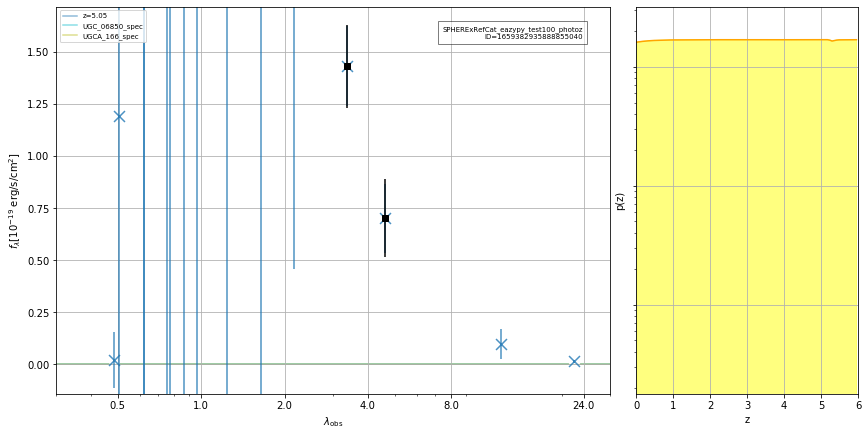

In [126]:
dummy = kasi_wrapper_fit_each_object_show(222, ez, verbose=True, get_best_fit=False, prior=True, beta_prior=False, fitter='nnls')

>>Fitting time: 0.021 s 
>>idx_fit: 4, zbest: 0.37705937, lnpmax: 2.3110955
>>Valid Bands:  [False False False  True  True  True  True False False False  True  True
  True  True  True]
>>NumValid Bands:  9


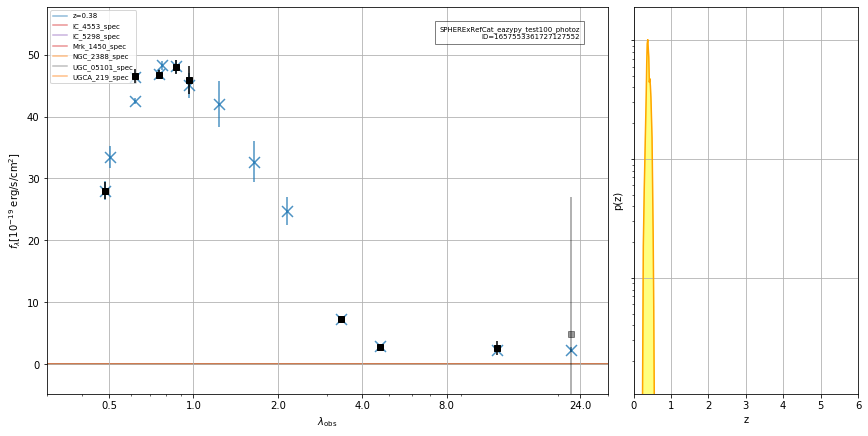

In [127]:
dummy = kasi_wrapper_fit_each_object_show(4, ez, verbose=True, get_best_fit=False, prior=True, beta_prior=False, fitter='nnls')

In [128]:
dummy['valid']

array([False, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True])

In [129]:
np.sum(dummy['valid'])

9

#### Trying different panels showing more specific info 

In [198]:
def kasi_wrapper_fit_each_object_show_new(idx_fit, ez, outfile=False, showplot=True, verbose=False, get_best_fit=True, \
                                          prior=False, beta_prior=False, \
                                          clip_wavelength=1100,fitter='nnls'):

    import numpy as np
    #import matplotlib.pyplot as plt
    import time
    #import multiprocessing as mp
    from collections import OrderedDict
    from eazy.photoz import template_lsq
    from eazy.photoz import utils
    from eazy.photoz import igm_module
    import astropy.units as u
    from scipy.integrate import cumtrapz
    
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec
    

    # plot settings
    #plt.rc('font', family='serif') 
    #plt.rc('font', serif='Times New Roman') 
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['mathtext.fontset'] = 'stix'
    
    
    # nearest, interp
    TEMPLATE_REDSHIFT_TYPE = 'nearest'
    IGM_OBJECT = igm_module.Inoue14()

    

    fnu_corr = ez.fnu[idx_fit,:]*ez.ext_redden*ez.zp
    efnu_corr = ez.efnu[idx_fit,:]*ez.ext_redden*ez.zp
            
    efnu_corr[ez.fnu[idx_fit,:] < ez.param['NOT_OBS_THRESHOLD']] = ez.param['NOT_OBS_THRESHOLD'] - 9.
    
    #variables for show : SED 
    fnu_show = np.squeeze(ez.fnu[idx_fit,:])*ez.ext_redden*ez.zp
    efnu_show = np.squeeze(ez.efnu[idx_fit,:])*ez.ext_redden*ez.zp
    ok_band_show = (fnu_show/ez.zp > ez.param['NOT_OBS_THRESHOLD'])
    ok_band_show &= (efnu_show/ez.zp > 0)
    efnu_show[~ok_band_show] = ez.param['NOT_OBS_THRESHOLD'] - 9.
    zspec_show = ez.ZSPEC[idx_fit]
    
    log_prior_show = ez.full_logprior[idx_fit,:].flatten()
    
    #print("ix: ",idx_fit)
    #print("id: ",ez.OBJID[idx_fit])
    #print("fnu: ",fnu_show)
    #print("efnu: ",efnu_show)
    #print("ok_band: ",ok_band_show)
    #print("zspec: ",zspec_show)
    
    t0 = time.time()

    idummy, tempchi, tempcoeff, tempfmodel = kasi_fit_object(ez,iobj=idx_fit,z=0)
    #print("idummy ="+str(idummy))
    
    
    ''' We should avoid updating ez.DATAFIELDs to broad-cast `ez`. `ez` should only have setting parameters, not calculated results 
    ez.chi2_fit[idx_fit,:] = tempchi
    ez.fit_coeffs[idx_fit,:] = tempcoeff
    ez.fmodel[idx_fit,:] = tempfmodel
    kasi_compute_lnp(ez,prior=prior, beta_prior=beta_prior, in_place=True)
    '''

    # now, templnp is an 1d array and templnpmax is a scalar
    idummy2, templnp, templnpmax = kasi_compute_lnp_object(idx_fit,tempchi,ez, prior=prior, \
                                                           beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    # Fit the z-best using Parabola function
    zbest, lnpmaxbest = kasi_get_redshift_object(idx_fit, ez, templnp, templnpmax,get_best_fit=get_best_fit, prior=prior, \
                                          beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    t1 = time.time()
    
    if verbose:
        print('>>Fitting time: {0:.3f} s '.format(t1-t0))
        '''
        print('>>idx_fit: '+str(idx_fit)+' lnpmax: '+str(ez.lnpmax[idx_fit]))
        '''
        print('>>idx_fit: '+str(idx_fit)+', zbest: '+str(zbest)+', lnpmax: '+str(lnpmaxbest))
    
    #variables for show : Coeffs at zbest
    ndraws = ez.NDRAWS
    tef_show = ez.TEF(zbest)
    A = np.squeeze(ez.tempfilt(zbest))
    chi2_show, coeffs_show, fmodel, draws = template_lsq(fnu_show, efnu_show, A, \
                                                         tef_show, ez.zp, ndraws, fitter='nnls')
    #print("ndraws: ",ndraws)
    #print("tef: ",tef_show)
    #print("chi2: ",chi2_show)
    #print("coeffs: ",coeffs_show)
    #print("fmodel: ",fmodel)
    #print("draws: ",draws)
    
    
    if draws is None:
        efmodel = 0
    else:
        efmodel = np.percentile(np.dot(draws, A), [16,84], axis=0)
        efmodel = np.squeeze(np.diff(efmodel, axis=0)/2.)
    
    #print("efmodel",efmodel)
    
    #variables for show : Full SED
    templ = ez.templates[0]
    tempflux = np.zeros((ez.NTEMP, templ.wave.shape[0]),dtype=ez.ARRAY_DTYPE)
    
    
    for i in range(ez.NTEMP):
        zargs = {'z':zbest, 'redshift_type':TEMPLATE_REDSHIFT_TYPE}
        fnu = ez.templates[i].flux_fnu(**zargs)*ez.tempfilt.scale[i]
    try:
        tempflux[i, :] = fnu
    except:
        tempflux[i, :] = np.interp(templ.wave,ez.templates[i].wave, fnu)
    
    
    templz = templ.wave*(1+zbest)
    
    if ez.tempfilt.add_igm:
        igmz = templ.wave*0.+1
        lyman = templ.wave < 1300
        igmz[lyman] = IGM_OBJECT.full_IGM(zbest, templz[lyman])
    else:
        igmz = 1.
    templf = np.dot(coeffs_show, tempflux)*igmz
    
    if draws is not None:
        templf_draws = np.dot(draws, tempflux)*igmz
    
    fnu_factor = 10**(-0.4*(ez.param['PRIOR_ABZP']+48.6))
    
    
    templz_power = -2
    flam_spec = utils.CLIGHT*1.e10/templz**2/1.e-19
    flam_sed = utils.CLIGHT*1.e10/ez.pivot**2/ez.ext_corr/1.e-19
    ylabel = (r'$f_\lambda [10^{-19}$ erg/s/cm$^2$]')
    flux_unit = 1.e-19*u.erg/u.s/u.cm**2/u.AA
    
    #print("tempflux: ",tempflux)
    #print("igmz: ",igmz)
    
    
    
    try:
        showdata = OrderedDict(ix=idx_fit,idobj=ez.OBJID[idx_fit], zbest=zbest, \
                               z_spec=zspec_show, pivot=ez.pivot, \
                               model=fmodel*fnu_factor*flam_sed, \
                               emodel=efmodel*fnu_factor*flam_sed, \
                               fobs=fnu_show*fnu_factor*flam_sed, \
                               efobs=efnu_show*fnu_factor*flam_sed, \
                               valid=ok_band_show, \
                               tef=tef_show, \
                               templz=templz, \
                               templf=templf*fnu_factor*flam_spec, \
                               flux_unit=flux_unit, \
                               wave_unit=u.AA, \
                               chi2=chi2_show, coeffs=coeffs_show)
    except:
        showdata = None
    
    
    print(">>Valid Bands: ",showdata['valid'])
    print(">>NumValid Bands: ",np.sum(showdata['valid']))
    
    ###### Make the plot
    axes=None
    figsize=[12,12]
    showpz=0.4
    template_color='#1f77b4'
    snr_thresh=2.
    with_tef=True
    show_upperlimits=True
    show_components=True
    show_redshift_draws=200
    draws_cmap=None
    if showplot:

        if axes is None:
            fig = plt.figure(figsize=figsize)
            if showpz:
                fig_axes = GridSpec(2,1,height_ratios=[1,showpz])
            else:    
                fig_axes = GridSpec(1,1,height_ratios=[1])
                
            ax = fig.add_subplot(fig_axes[0])
        else:
            fig = None
            fig_axes = None
            ax = axes[0]
                        
        ax.scatter(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed, 
                   color='w', label=None, zorder=1, s=120, marker='o')
        
        ax.scatter(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed, marker='x',
                  color=template_color, label=None, zorder=2, s=120, 
                  alpha=0.8)
        if draws is not None:
            ax.errorbar(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed,
                        efmodel*fnu_factor*flam_sed, alpha=0.8,
                        color=template_color, zorder=2,
                        marker='None', linestyle='None', label=None)
            
        # Missing data
        missing = (fnu_show < ez.param['NOT_OBS_THRESHOLD']) 
        missing |= (efnu_show < 0)
        
        # Detection
        sn2_detection = (~missing) & (fnu_show/efnu_show > snr_thresh)
        
        # S/N < 2
        sn2_not = (~missing) & (fnu_show/efnu_show <= snr_thresh)
        
        # Uncertainty with TEF
        if with_tef:
            err_tef = np.sqrt(efnu_show**2+(tef_show*fnu_show)**2)            
        else:
            err_tef = efnu_show*1
            
        ax.errorbar(ez.pivot[sn2_detection]/1.e4, 
                    (fnu_show*fnu_factor*flam_sed)[sn2_detection], 
                    (err_tef*fnu_factor*flam_sed)[sn2_detection], 
                    color='k', marker='s', linestyle='None', label=None, 
                    zorder=10)
        
        # show upper limits
        if show_upperlimits:
            ax.errorbar(ez.pivot[sn2_not]/1.e4, 
                        (fnu_show*fnu_factor*flam_sed)[sn2_not], 
                        (efnu_show*fnu_factor*flam_sed)[sn2_not], color='k', 
                        marker='s', alpha=0.4, linestyle='None', label=None)

        pl = ax.plot(templz/1.e4, templf*fnu_factor*flam_spec, alpha=0.5, 
                     zorder=-1, color=template_color, 
                     label='z={0:.2f}'.format(zbest))
        
        # show components
        if show_components:
            colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
            
            for i in range(ez.NTEMP):
                if coeffs_show[i] != 0:
                    pi = ax.plot(templz/1.e4, 
                        coeffs_show[i]*tempflux[i,:]*igmz*fnu_factor*flam_spec, 
                              alpha=0.5, zorder=-1, 
                              label=ez.templates[i].name.split('.dat')[0], 
                              color=colors[i % len(colors)])
                            
        if show_redshift_draws:
            
            if draws_cmap is None:
                draws_cmap = plt.cm.rainbow
                
            # Draw random values from p(z)
            pz = np.exp(templnp).flatten()
            pzcum = cumtrapz(pz, x=ez.zgrid)
            
            if show_redshift_draws == 1:
                nzdraw = 100
            else:
                nzdraw = show_redshift_draws*1
            
            rvs = np.random.rand(nzdraw)
            zdraws = np.interp(rvs, pzcum, ez.zgrid[1:])
            
            for zi in zdraws:
                Az = np.squeeze(ez.tempfilt(zi))
                chi2_zi, coeffs_zi, fmodelz, __ = template_lsq(fnu_show, efnu_show, 
                                                       Az, 
                                                       ez.TEF(zi), ez.zp, 
                                                       0, fitter='nnls')
                                                       
                c_i = np.interp(zi, ez.zgrid, np.arange(ez.NZ)/ez.NZ)
                
                templzi = templ.wave*(1+zi)
                if ez.tempfilt.add_igm:
                    igmz = templ.wave*0.+1
                    lyman = templ.wave < 1300
                    igmz[lyman] = IGM_OBJECT.full_IGM(zi, templzi[lyman])
                else:
                    igmz = 1.

                templfz = np.dot(coeffs_zi, tempflux)*igmz                
                templfz *=  flam_spec * (templz / templzi)**templz_power
                
                plz = ax.plot(templzi/1.e4, templfz*fnu_factor,
                             alpha=np.maximum(0.1, 1./nzdraw), 
                             zorder=-1, color=draws_cmap(c_i))
                
        if draws is not None:
            templf_width = np.percentile(templf_draws*fnu_factor*flam_spec, 
                                         [16,84], axis=0)
            ax.fill_between(templz/1.e4, templf_width[0,:], templf_width[1,:], 
                            color=pl[0].get_color(), alpha=0.1, label=None)
                
        # show x y labels 
        add_label=True
        FNTSIZE=20
        xlim=[0.3, 30]
        if axes is None:            
            ax.set_ylabel(ylabel)
            
            if sn2_detection.sum() > 0:
                ymax = (fmodel*fnu_factor*flam_sed)[sn2_detection].max()
            else:
                ymax = (fmodel*fnu_factor*flam_sed).max()
                        
            if np.isfinite(ymax):
                ax.set_ylim(-0.1*ymax, 1.2*ymax)

            ax.set_xlim(xlim)
            xt = np.array([0.1, 0.5, 1, 2, 4, 8, 24, 160, 500])*1.e4

            ax.semilogx()

            valid_ticks = (xt > xlim[0]*1.e4) & (xt < xlim[1]*1.e4)
            if valid_ticks.sum() > 0:
                xt = xt[valid_ticks]
                ax.set_xticks(xt/1.e4)
                ax.set_xticklabels(xt/1.e4)

            ax.set_xlabel(r'$\lambda_\mathrm{obs}$')
            ax.grid()
            
            if add_label:
                txt = '{0}\nID={1}'
                txt = txt.format(ez.param['MAIN_OUTPUT_FILE'], 
                                 showdata['idobj']) #, self.prior_mag_cat[ix])
                                 
                ax.text(0.95, 0.95, txt, ha='right', va='top', fontsize=FNTSIZE,
                        transform=ax.transAxes, 
                        bbox=dict(facecolor='w', alpha=0.5), zorder=10)
                
                ax.legend(fontsize=12, loc='center right')
        
                
        ## P(z)
        show_prior=False
        logpz=False
        zr=[0,6]
        zshow=zbest
        bool_pzlabels=False
        if not showpz:
            return fig, showdata
            
        if axes is not None:
            if len(axes) == 1:
                return fig, showdata
            else:
                ax = axes[1]
        else:
            ax = fig.add_subplot(fig_axes[1])
        
        chi2 = np.squeeze(chi2_show)
        prior = np.exp(log_prior_show)
        #pz = np.exp(-(chi2-chi2.min())/2.)*prior
        #pz /= np.trapz(pz, self.zgrid)
        pz = np.exp(templnp).flatten()
        
        ax.plot(ez.zgrid, pz, color='orange', label=None)
        if show_prior:
            ax.plot(ez.zgrid, prior/prior.max()*pz.max(), color='g',
                label='prior')
        
        ax.fill_between(ez.zgrid, pz, pz*0, color='yellow', alpha=0.5, 
                        label=None)
        if zspec_show > 0:
            ax.vlines(zspec_show, 1.e-5, pz.max()*1.05, color='r',
                      label='zspec={0:.3f}'.format(zspec_show))
        
        if zshow is not None:
            ax.vlines(zshow, 1.e-5, pz.max()*1.05, color=template_color, 
                      label='z={0:.3f}'.format(zshow), linestyles='dashed')
            
        if axes is None:
            ax.set_ylim(0,pz.max()*1.05)
            
            if logpz:
                ax.semilogy()
                ymax = np.minimum(ax.get_ylim()[1], 100)
                ax.set_ylim(1.e-3*ymax, 1.8*ymax)
                
            if zr is None:
                ax.set_xlim(0,self.zgrid[-1])
            else:
                ax.set_xlim(zr)
                
            ax.set_xlabel('z'); ax.set_ylabel('p(z)')
            ax.grid()
            if not bool_pzlabels:
                ax.set_yticklabels([])
            
            fig_axes.tight_layout(fig, pad=0.5)
            
            if add_label & (zspec_show > 0):
                ax.legend(fontsize=7, loc='upper left')
        # Save or not
        if outfile:
            fig.savefig(outfile)
            currentdir = %pwd
            print(">>"+outfile+" is saved on your current dirctory: "+currentdir)
    
    
    
    return showdata

>>Fitting time: 0.025 s 
>>idx_fit: 4, zbest: 0.37705937, lnpmax: 2.3110955
>>Valid Bands:  [False False False  True  True  True  True False False False  True  True
  True  True  True]
>>NumValid Bands:  9
>>sed-vis.png is saved on your current dirctory: /home/shong/work/sed-fit/pyspark-eazypy/notebook


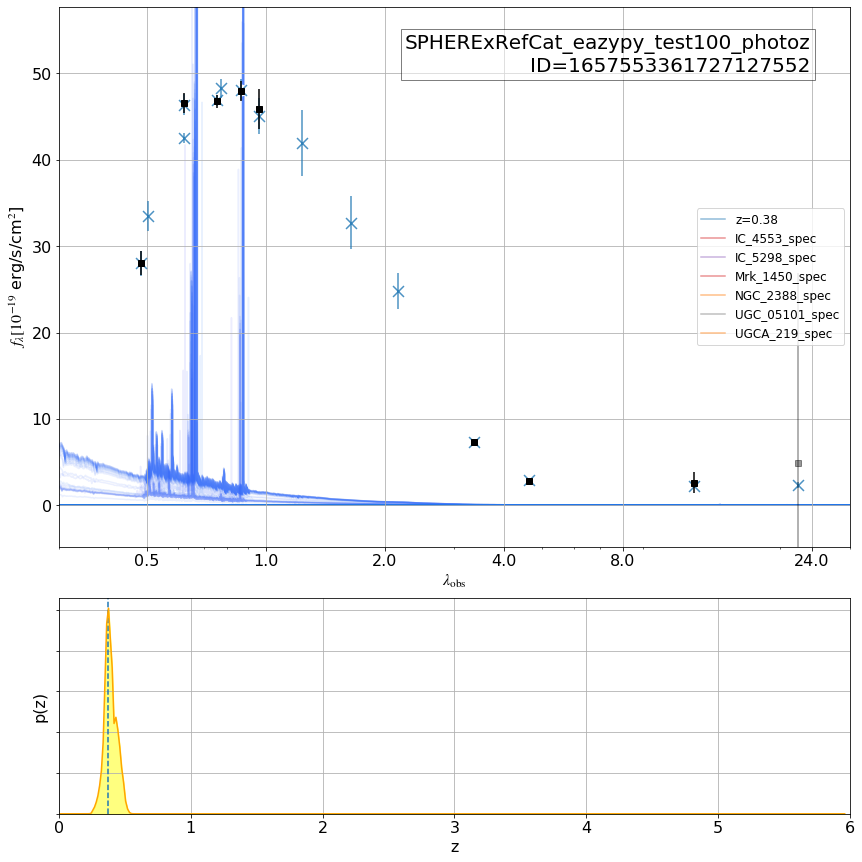

In [199]:
dummy = kasi_wrapper_fit_each_object_show_new(4, ez, outfile='sed-vis.png', verbose=True, get_best_fit=False, prior=True, beta_prior=False, fitter='nnls')

>>Fitting time: 0.022 s 
>>idx_fit: 999, zbest: 0.4048778, lnpmax: 1.3110908
>>Valid Bands:  [False False False  True  True False False False False False  True  True
  True  True  True]
>>NumValid Bands:  7
>>sed-vis.png is saved on your current dirctory: /home/shong/work/sed-fit/pyspark-eazypy/notebook


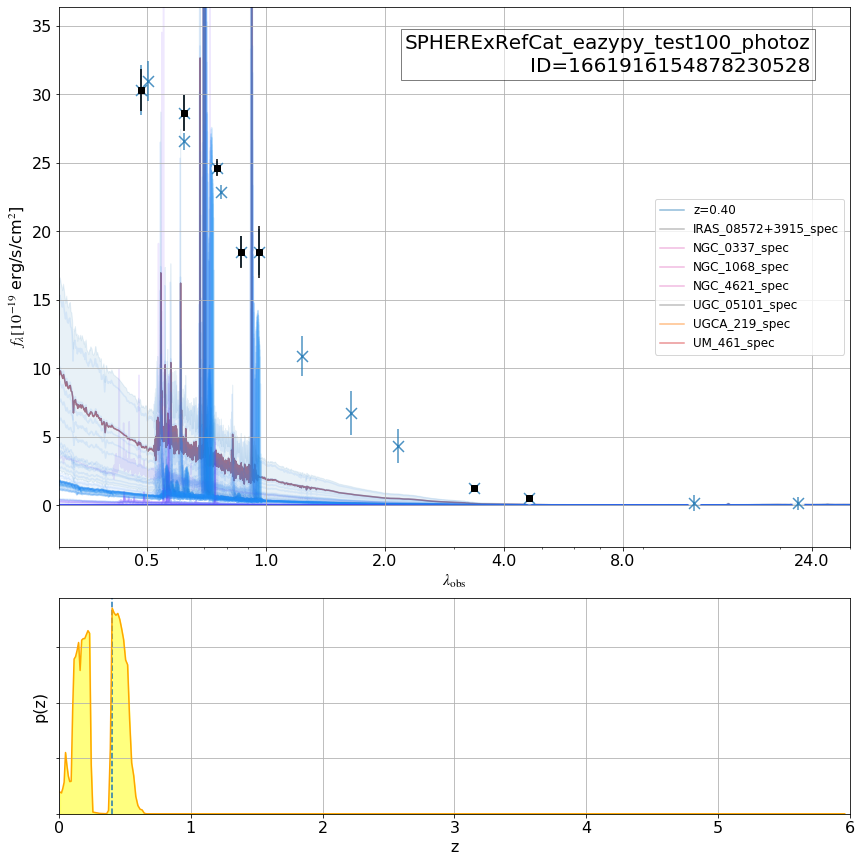

In [201]:
dummy = kasi_wrapper_fit_each_object_show_new(999, ez, outfile='sed-vis.png', verbose=True, get_best_fit=False, prior=True, beta_prior=False, fitter='nnls')

In [187]:
import matplotlib

In [133]:
dir(matplotlib.gridspec.GridSpec)

['_AllowedKeys',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_geometry',
 'get_grid_positions',
 'get_height_ratios',
 'get_subplot_params',
 'get_width_ratios',
 'locally_modified_subplot_params',
 'new_subplotspec',
 'set_height_ratios',
 'set_width_ratios',
 'tight_layout',
 'update']

In [134]:
1.e4

10000.0

In [135]:
zargs = {'z':0.5, 'redshift_type':'nearest'}

In [136]:
ez.templates[0].flux_fnu(**zargs)

array([3.70815621e-36, 5.04870555e-36, 7.00081242e-36, ...,
       1.91246057e-23, 1.43525221e-23, 1.44585269e-23])

In [137]:
ez.TEF(0.4)

array([0.00607726, 0.00706623, 0.00434927, 0.02033074, 0.03440101,
       0.06013191, 0.06032718, 0.00664645, 0.00557907, 0.00831235,
       0.00733506, 0.00606979, 0.00451593, 0.00499574, 0.00734483])

In [138]:
ez.pivot

array([  6209.26820375,   5050.67538326,   7705.35816619,  33682.13713452,
        46178.8407016 , 120725.45852906, 221930.32677929,  12357.51486216,
        16457.50396511,  21602.52337375,   4849.11422473,   6201.18504113,
         7534.95513353,   8674.18355141,   9627.76587918])

In [139]:
ez.templates[0]

<class 'eazy.templates.Template'>: Arp_118_spec.dat

In [140]:
ez.zp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [141]:
ez.tempfilt.add_igm

1.4

In [142]:
ez.tempfilt(0.2)

array([[3.45846534e-25, 1.90549714e-25, 5.80031845e-25, ...,
        5.68768481e-25, 7.07786131e-25, 8.30678438e-25],
       [7.23837493e-26, 5.18682116e-26, 1.01244967e-25, ...,
        1.03836880e-25, 1.11096550e-25, 1.23070532e-25],
       [6.95488475e-26, 5.00606136e-26, 9.68449075e-26, ...,
        1.01591647e-25, 1.04012641e-25, 1.18791668e-25],
       ...,
       [4.25715719e-26, 4.05116868e-26, 4.35223125e-26, ...,
        4.65104644e-26, 4.22595943e-26, 4.33942244e-26],
       [2.90709027e-26, 2.44700191e-26, 3.34607542e-26, ...,
        3.71023577e-26, 3.32361427e-26, 3.51144570e-26],
       [1.47612374e-26, 1.32031661e-26, 1.50767560e-26, ...,
        1.74122823e-26, 1.35094753e-26, 1.38838195e-26]])

In [143]:
ez.NDRAWS

100

In [144]:
ez.NTEMP

129

In [145]:
ez.templates[0].wave.shape[0]

2282

In [146]:
ez.ARRAY_DTYPE

numpy.float32

In [147]:
ez.param['PRIOR_ABZP']

25

In [148]:
10**(-0.4*(ez.param['PRIOR_ABZP']+48.6))

3.6307805477010325e-30

In [149]:
ez.ZSPEC[2]

-1.0

In [150]:
import astropy.units as u

In [151]:
u.AA

Unit("Angstrom")

In [152]:
if 2:
    print("0")

0


In [153]:
eazy.photoz.utils.CLIGHT

299792458.0

In [154]:
ez.OBJID

1657553357130170369
1657553357130170370
1657553357398605824
1657553361425137666
1657553361727127552
1657553361727127553
1657694094517862401
1657694094618525696
1657694099181928448
1657694103208460288
1657694103208460289


>>Fitting time: 0.019 s 
>>idx_fit: 736, zbest: 0.61599416, lnpmax: 2.280231
>>Valid Bands:  [False False False  True  True False False False False False  True  True
  True  True  True]
>>NumValid Bands:  7


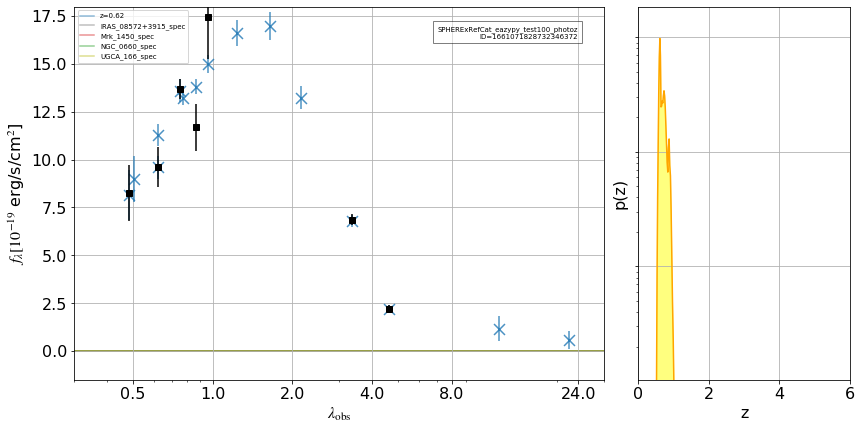

In [156]:
showdata = kasi_wrapper_fit_each_object_show(736, ez, verbose=True, get_best_fit=False, prior=False, beta_prior=False, fitter='nnls')

In [157]:
print(showdata)

OrderedDict([('ix', 736), ('idobj', 1661071828732346372), ('zbest', 0.61599416), ('z_spec', -1.0), ('pivot', array([  6209.26820375,   5050.67538326,   7705.35816619,  33682.13713452,
        46178.8407016 , 120725.45852906, 221930.32677929,  12357.51486216,
        16457.50396511,  21602.52337375,   4849.11422473,   6201.18504113,
         7534.95513353,   8674.18355141,   9627.76587918])), ('model', array([11.27444434,  9.0050261 , 13.23960443,  6.79135503,  2.1884966 ,
        1.15417878,  0.57041546, 16.61294601, 16.9811666 , 13.23010154,
        8.14586805,  9.59909607, 13.58692902, 13.8029508 , 14.9845722 ])), ('emodel', array([0.58821858, 1.20108394, 0.37674719, 0.30012368, 0.2074072 ,
       0.65663666, 0.46983644, 0.6566599 , 0.74184068, 0.59704738,
       1.31952084, 0.58841657, 0.60380588, 0.38186482, 0.46375594])), ('fobs', array([-2.79495654e+02, -4.22432170e+02, -1.81497328e+02,  6.86785970e+00,
        2.20970676e+00, -7.39363778e-01, -2.18787544e-01, -7.05656936e+01,
  

>>Fitting time: 0.024 s 
>>idx_fit: 5, zbest: 0.6546126487199366, lnpmax: 1.5883853632708451
>>Valid Bands:  [False False False  True  True  True  True False False False  True  True
  True  True  True]
>>NumValid Bands:  9


OrderedDict([('ix', 5),
             ('idobj', 1657553361727127553),
             ('zbest', 0.6546126487199366),
             ('z_spec', -1.0),
             ('pivot',
              array([  6209.26820375,   5050.67538326,   7705.35816619,  33682.13713452,
                      46178.8407016 , 120725.45852906, 221930.32677929,  12357.51486216,
                      16457.50396511,  21602.52337375,   4849.11422473,   6201.18504113,
                       7534.95513353,   8674.18355141,   9627.76587918])),
             ('model',
              array([ 6.20659168,  3.53781407,  8.2345429 ,  4.36532699,  1.51212457,
                      1.08889485,  0.46137016,  9.69747426, 10.1507703 ,  8.26532429,
                      2.73820739,  5.29190335,  8.19145406,  8.87298044,  9.27010915])),
             ('emodel',
              array([0.51970703, 1.1804061 , 0.42429792, 0.20485748, 0.06710014,
                     0.17871349, 0.05462911, 0.51614726, 0.46226753, 0.38343491,
                     

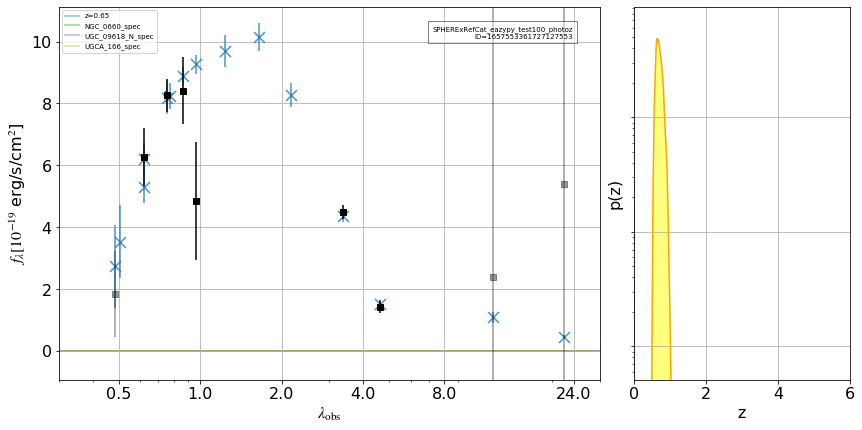

In [158]:
kasi_wrapper_fit_each_object_show(5, ez, verbose=True, get_best_fit=True, prior=False, beta_prior=False, fitter='nnls')

>>Fitting time: 0.019 s 
>>idx_fit: 333, zbest: 0.41899708, lnpmax: -0.13891685
>>Valid Bands:  [False False False False False False False False False False  True  True
  True  True  True]
>>NumValid Bands:  5


OrderedDict([('ix', 333),
             ('idobj', 1659805169728094208),
             ('zbest', 0.41899708),
             ('z_spec', -1.0),
             ('pivot',
              array([  6209.26820375,   5050.67538326,   7705.35816619,  33682.13713452,
                      46178.8407016 , 120725.45852906, 221930.32677929,  12357.51486216,
                      16457.50396511,  21602.52337375,   4849.11422473,   6201.18504113,
                       7534.95513353,   8674.18355141,   9627.76587918])),
             ('model',
              array([14.66571371, 13.47973362, 15.35160644,  1.91067312,  1.11460717,
                      0.9474751 ,  0.74345551, 10.99763631,  8.5529876 ,  6.00762636,
                     12.41925342, 14.93727314, 15.74344506, 13.76204888, 15.78809231])),
             ('emodel',
              array([0.52750983, 1.07985628, 0.43428905, 0.70013857, 1.19426753,
                     1.512637  , 1.37104364, 1.12887956, 1.12729291, 1.02050051,
                     1.4439

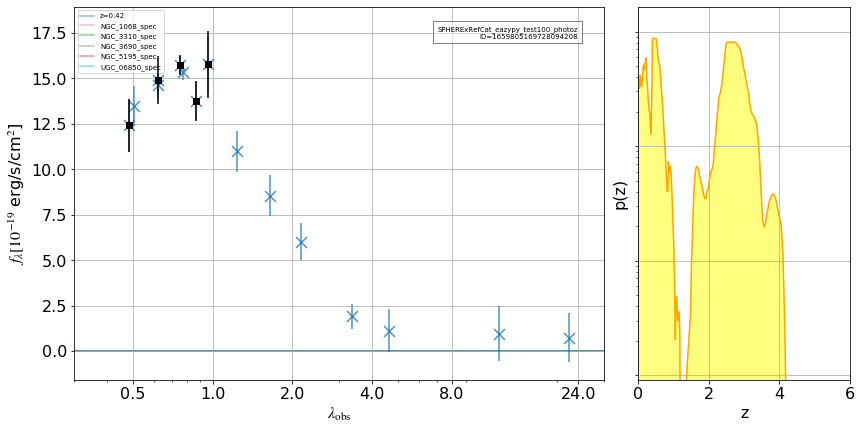

In [159]:
kasi_wrapper_fit_each_object_show(333, ez, verbose=True, get_best_fit=False, prior=False, beta_prior=False, fitter='nnls')

In [160]:
kasi_wrapper_fit_each_object(444, ez, get_best_fit=True, prior=False, beta_prior=False, fitter='nnls')

[4.648202319732835,
 [0.5394244955005902,
  0.0012090435218541152,
  1.7455160614057093,
  38.125335358159646,
  31.27409202169587,
  27.179525885657995,
  12.605799385716864,
  10.363949594577093,
  11.153824874944632,
  12.952075501722334,
  2.0422851975581721e-10,
  0.016315913980601615,
  0.15987735124040814,
  5.34868138948724,
  9.355996104111567]]

# Explore how `show_fit` works 

In [161]:
ez.param.params['VERBOSITY'] = 1.0

In [162]:
ez.fnu[999]

array([-99.      , -99.      , -99.      ,  13.390599,   9.79039 ,
       -99.      , -99.      , -99.      , -99.      , -99.      ,
         6.5524  ,  10.121387,  12.848145,  12.793813,  15.728235],
      dtype=float32)

In [163]:
ez.ok_data[999]

array([False, False, False,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True])

In [164]:
ez.ok_data[999]

array([False, False, False,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True])

>>Fitting time: 0.023 s 
>>idx_fit: 999, zbest: 0.41166232565197375, lnpmax: 1.4486035600457399
>>Valid Bands:  [False False False  True  True False False False False False  True  True
  True  True  True]
>>NumValid Bands:  7


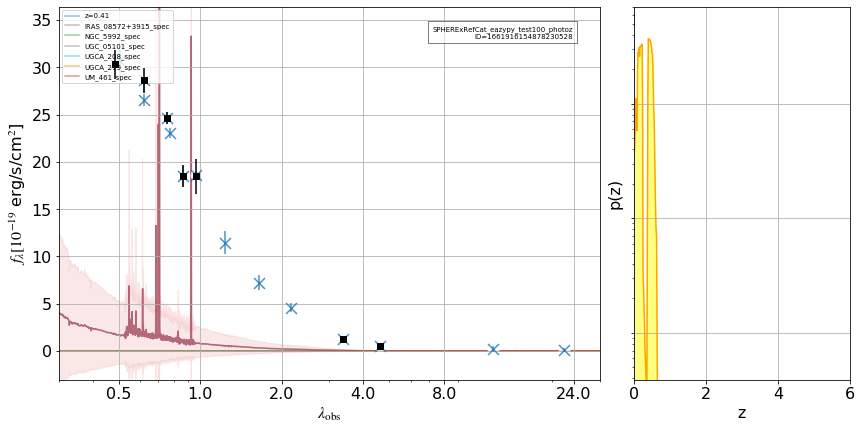

In [200]:
tempout = kasi_wrapper_fit_each_object_show(999, ez, verbose=True, get_best_fit=True, prior=False, beta_prior=False, fitter='nnls')

### Rough estimation of running time

In [166]:
0.025 * len(photdf.index) / 3600.0

0.8619236111111112

> For each sed-fit, 0.025sec. <br> For the `len(photdf.index)`, roughly 112k, it will take 51 minutes. 

In [167]:
0.025 * 1000000000.0 / 3600.0 /24.0 #in days, for 1 billion objects

289.35185185185185